### How are in-demand skills trending for Data Analysts?

#### Methodology

    1. Aggregate skill counts monthly
    2. Re-analyze based on percentage of total jobs
    3. Plot the monthly skill demand

In [4]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import ast
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [7]:
df_da_us = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()

In [8]:
df_da_us['job_posted_month_no'] = df_da_us['job_posted_date'].dt.month

In [9]:
df_da_us_explode = df_da_us.explode('job_skills')

In [14]:
df_da_us_pivot = df_da_us_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_da_us_pivot.loc['Total'] = df_da_us_pivot.sum()

df_da_us_pivot = df_da_us_pivot[df_da_us_pivot.loc['Total'].sort_values(ascending=False).index]

df_da_us_pivot = df_da_us_pivot.drop('Total')

<Axes: xlabel='job_posted_month_no'>

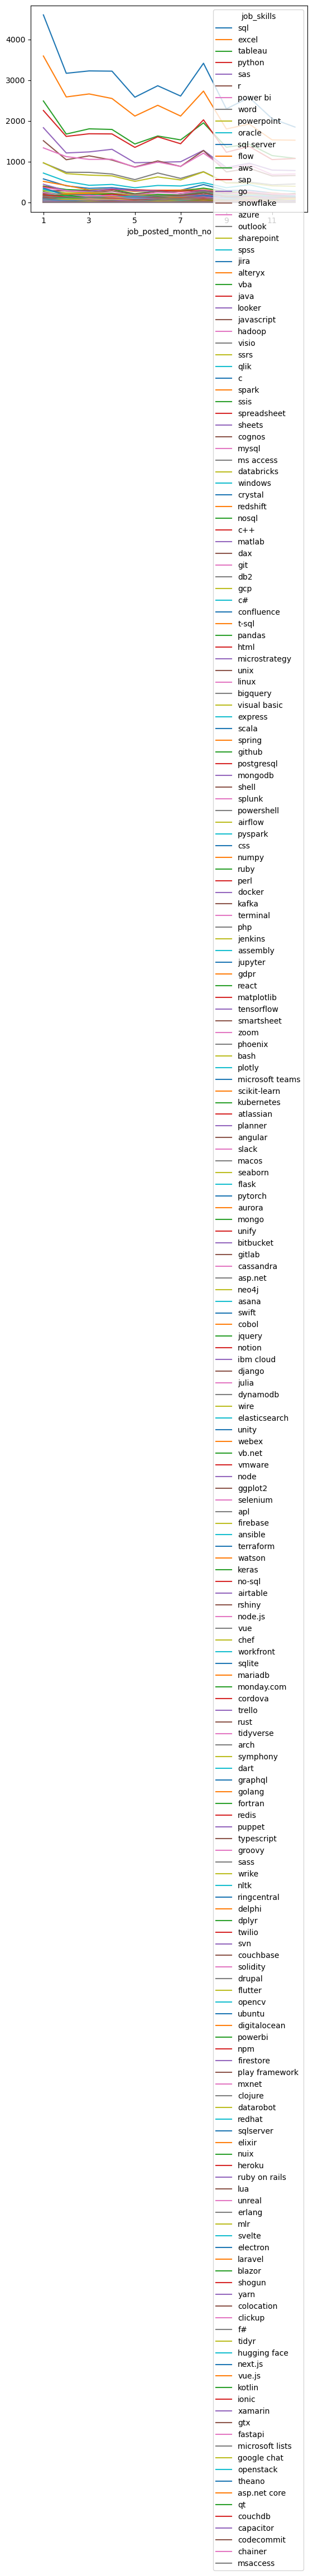

In [15]:
df_da_us_pivot.plot(kind='line')

In [17]:
da_totals = df_da_us.groupby('job_posted_month_no').size()

In [19]:
df_da_us_perc = df_da_us_pivot.div(da_totals/100, axis=0)

In [21]:
df_da_us_perc = df_da_us_perc.reset_index()
df_da_us_perc['job_posted_month'] = df_da_us_perc['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_da_us_perc = df_da_us_perc.set_index('job_posted_month')
df_da_us_perc = df_da_us_perc.drop(columns='job_posted_month_no')

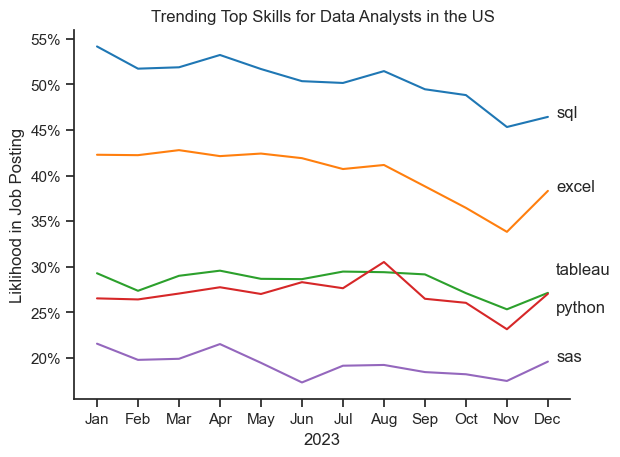

In [37]:
df_plot = df_da_us_perc.iloc[:, :5]

sns.lineplot(df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()
plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Liklihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    if df_plot.columns[i] == 'tableau':
        plt.text(11.2, df_plot.iloc[-1, i]+2, df_plot.columns[i])
    elif df_plot.columns[i] == 'python':
        plt.text(11.2, df_plot.iloc[-1, i]-2, df_plot.columns[i])
    else:
        plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])

plt.show()